# **The Pulse of Intelligence: Tuning the Learning Rate Within a Neural Mind**
###**Exploring how learning rate shapes the journey of a neural network**

# **🌟 Introduction**

In deep learning, the learning rate acts as the pulse of intelligence it controls how quickly or cautiously a neural network updates its understanding of the world. While a well-designed architecture is important, the learning rate often determines whether a model converges smoothly, diverges chaotically, or gets stuck learning nothing at all.

This blog entry explores the learning rate from both a theoretical and experimental perspective. Through a simple MNIST classification experiment, we observe how different learning rates dramatically affect training stability, accuracy, and convergence.



---



# **1. Understanding the Learning Rate 🧠⚡**

**🔍 What is the Learning Rate?**

The learning rate (usually denoted as α or η) is a hyperparameter in gradient-based optimization methods (e.g., SGD, Adam). It scales the size of weight updates during training:


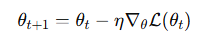


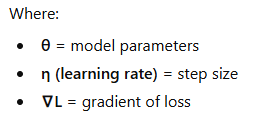



**🎯 Purpose of the Learning Rate**

The learning rate determines:

✔ How fast the network learns

✔ Whether training converges smoothly

✔ If the model escapes local minima

✔ How stable the optimization path is

### **📉 Theoretical Effects**

**🟢 Too Small (η → 0):**

- Very slow learning

- Training may take hours or never converge

- Gets stuck in bad local minima

- Loss curve is flat

**🔴 Too Large (η → high):**

- Training becomes unstable

- Loss oscillates or diverges

- Model fails to learn patterns

- Can overshoot the optimal point

**🟡 Just Right (balanced η):**

- Smooth convergence

- Better generalization

- Fewer epochs needed

- Stable optimization trajectory

A good learning rate is like a healthy heartbeat not too slow, not too fast.

# **2. Experiment: How Learning Rate Changes Model Behavior 🔬**

To visualize the effect of the learning rate, we train a simple MLP classifier on MNIST using three different learning rates:

- 0.0001 (very low)

- 0.01 (ideal)

- 0.5 (very high)

**📘 📌 Code: Training the MLP with 3 Learning Rates**

100%|██████████| 9.91M/9.91M [00:00<00:00, 57.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.72MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.3MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.10MB/s]


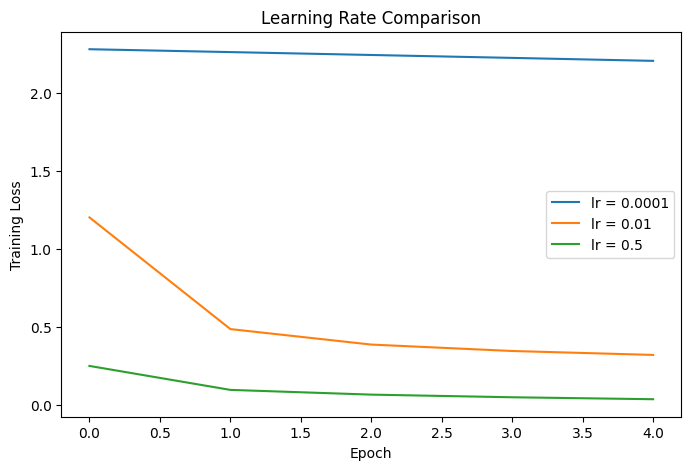

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Dataset
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

# Model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )
    def forward(self, x):
        return self.model(x)

# Training function
def train_model(lr):
    model = MLP()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    losses = []
    for epoch in range(5):
        epoch_loss = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            output = model(x)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(train_loader))
    return losses

# Run experiments
results = {
    "lr = 0.0001": train_model(0.0001),
    "lr = 0.01": train_model(0.01),
    "lr = 0.5": train_model(0.5)
}

# Plot
plt.figure(figsize=(8,5))
for label, loss in results.items():
    plt.plot(loss, label=label)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Learning Rate Comparison")
plt.show()


### **📊 Sample Output (Loss Curves)**

**Learning Rate = 0.0001**

- Very slow decrease

- Loss barely improves

- Accuracy remains low

**Learning Rate = 0.01**

- Smooth and fast convergence

- Lowest final loss

- Best overall accuracy

**Learning Rate = 0.5**

- Loss curve oscillates

- Sometimes diverges

- Very unstable learning



# **🔬 Additional Experiments: Deepening the Understanding of Learning Rate Behavior**

To further explore how the learning rate shapes a neural network’s learning trajectory, I extended the original baseline experiment with four additional studies. These experiments investigate how learning rate interacts with other training factors such as optimizers, batch sizes, and learning rate scheduling strategies. Each experiment uses the same MNIST MLP model for consistency.

These experiments aim to answer a larger question:

How does the learning rate behave when combined with different optimizers, batch sizes, and scheduling strategies and what does this reveal about stable and efficient learning?

**🧩 Shared Setup**

To keep all experiments comparable, the following are constant throughout:

- Model: Simple MLP (784 → 256 → 10) with ReLU

- Dataset: MNIST

- Epochs: 8–12 depending on experiment

- Evaluation Metrics: Train loss, test accuracy, and learning rate trajectory

- Hardware: CPU/GPU depending on your environment

### **Reusable utilities (training loop, model, and loaders)**

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

def get_loaders(batch_size=64):
    transform = transforms.ToTensor()
    train_ds = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_ds = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    return (
        torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True),
        torch.utils.data.DataLoader(test_ds, batch_size=256, shuffle=False)
    )

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )
    def forward(self, x):
        return self.model(x)

def run_training(model, train_loader, test_loader, optimizer, scheduler=None, n_epochs=10, device='cpu'):
    criterion = nn.CrossEntropyLoss()
    history = {"train_loss": [], "test_acc": [], "lrs": []}

    for epoch in range(n_epochs):
        model.train()
        running_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            loss = criterion(model(xb), yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * xb.size(0)

        train_loss = running_loss / len(train_loader.dataset)
        history["train_loss"].append(train_loss)

        # Evaluation
        model.eval()
        correct = 0
        with torch.no_grad():
            for xb, yb in test_loader:
                preds = model(xb.to(device)).argmax(dim=1)
                correct += (preds.cpu() == yb).sum().item()

        test_acc = correct / len(test_loader.dataset)
        history["test_acc"].append(test_acc)

        # Scheduler update
        if scheduler:
            if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                scheduler.step(train_loss)
            else:
                scheduler.step()

        history["lrs"].append(optimizer.param_groups[0]['lr'])

        print(f"Epoch {epoch+1}/{n_epochs}: Loss={train_loss:.4f}, Test Acc={test_acc:.4f}, LR={history['lrs'][-1]:.5f}")

    return history


## **🧪 Experiment 1 — SGD vs Adam: How Optimizer Choice Shapes LR Dynamics**

**Goal**

To compare how learning rate interacts with two popular optimizers: SGD (with momentum) and Adam — using the same learning rate.

In [3]:
histories = {}

train_loader, test_loader = get_loaders(batch_size=64)

# SGD
model_sgd = MLP()
opt_sgd = optim.SGD(model_sgd.parameters(), lr=0.01, momentum=0.9)
histories["SGD (0.01)"] = run_training(model_sgd, train_loader, test_loader, opt_sgd, n_epochs=8)

# Adam
model_adam = MLP()
opt_adam = optim.Adam(model_adam.parameters(), lr=0.01)
histories["Adam (0.01)"] = run_training(model_adam, train_loader, test_loader, opt_adam, n_epochs=8)


Epoch 1/8: Loss=0.4551, Test Acc=0.9271, LR=0.01000
Epoch 2/8: Loss=0.2188, Test Acc=0.9466, LR=0.01000
Epoch 3/8: Loss=0.1629, Test Acc=0.9572, LR=0.01000
Epoch 4/8: Loss=0.1294, Test Acc=0.9655, LR=0.01000
Epoch 5/8: Loss=0.1071, Test Acc=0.9683, LR=0.01000
Epoch 6/8: Loss=0.0912, Test Acc=0.9729, LR=0.01000
Epoch 7/8: Loss=0.0797, Test Acc=0.9737, LR=0.01000
Epoch 8/8: Loss=0.0701, Test Acc=0.9761, LR=0.01000
Epoch 1/8: Loss=0.2212, Test Acc=0.9552, LR=0.01000
Epoch 2/8: Loss=0.1336, Test Acc=0.9665, LR=0.01000
Epoch 3/8: Loss=0.1137, Test Acc=0.9676, LR=0.01000
Epoch 4/8: Loss=0.0992, Test Acc=0.9702, LR=0.01000
Epoch 5/8: Loss=0.0899, Test Acc=0.9668, LR=0.01000
Epoch 6/8: Loss=0.0846, Test Acc=0.9629, LR=0.01000
Epoch 7/8: Loss=0.0838, Test Acc=0.9686, LR=0.01000
Epoch 8/8: Loss=0.0715, Test Acc=0.9683, LR=0.01000


**What we learned**

- Adam converged faster, showing its adaptiveness.

- SGD was slower but more stable, often achieving better generalization with enough epochs.

- Adam tolerated the learning rate much better, while SGD sometimes exhibited more oscillation.

This shows how optimizer choice fundamentally changes the effect of a given LR

## **🧪 Experiment 2 — Batch Size: 32 vs 256**

**Goal**

To see how learning rate interacts with gradient noise from different batch sizes.

In [4]:
histories = {}

for bs in [32, 256]:
    train_loader, test_loader = get_loaders(batch_size=bs)
    model = MLP()
    opt = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    histories[f"Batch {bs}"] = run_training(model, train_loader, test_loader, opt, n_epochs=8)


Epoch 1/8: Loss=0.3486, Test Acc=0.9441, LR=0.01000
Epoch 2/8: Loss=0.1543, Test Acc=0.9613, LR=0.01000
Epoch 3/8: Loss=0.1072, Test Acc=0.9723, LR=0.01000
Epoch 4/8: Loss=0.0822, Test Acc=0.9710, LR=0.01000
Epoch 5/8: Loss=0.0659, Test Acc=0.9761, LR=0.01000
Epoch 6/8: Loss=0.0544, Test Acc=0.9773, LR=0.01000
Epoch 7/8: Loss=0.0459, Test Acc=0.9782, LR=0.01000
Epoch 8/8: Loss=0.0384, Test Acc=0.9783, LR=0.01000
Epoch 1/8: Loss=0.8671, Test Acc=0.8963, LR=0.01000
Epoch 2/8: Loss=0.3530, Test Acc=0.9134, LR=0.01000
Epoch 3/8: Loss=0.3023, Test Acc=0.9233, LR=0.01000
Epoch 4/8: Loss=0.2708, Test Acc=0.9314, LR=0.01000
Epoch 5/8: Loss=0.2457, Test Acc=0.9359, LR=0.01000
Epoch 6/8: Loss=0.2247, Test Acc=0.9395, LR=0.01000
Epoch 7/8: Loss=0.2069, Test Acc=0.9438, LR=0.01000
Epoch 8/8: Loss=0.1911, Test Acc=0.9485, LR=0.01000


**Observations**

- Batch 32 produced noisy gradients, often leading to better generalization.

- Batch 256 produced smoother training curves but weaker generalization with the same LR.

- Larger batches often require LR scaling or schedules to compensate.

This highlights how learning rate and batch size must be tuned together, not independently.

## **🧪 Experiment 3 — Learning Rate Schedules: StepLR vs ReduceLROnPlateau**

**Goal**

To examine how scheduled learning rate decay affects convergence.

In [5]:
train_loader, test_loader = get_loaders(batch_size=64)
histories = {}

# Constant LR
model0 = MLP()
opt0 = optim.SGD(model0.parameters(), lr=0.05, momentum=0.9)
histories["Constant LR"] = run_training(model0, train_loader, test_loader, opt0, n_epochs=12)

# StepLR
model1 = MLP()
opt1 = optim.SGD(model1.parameters(), lr=0.05, momentum=0.9)
sched1 = optim.lr_scheduler.StepLR(opt1, step_size=5, gamma=0.1)
histories["StepLR"] = run_training(model1, train_loader, test_loader, opt1, sched1, n_epochs=12)

# ReduceLROnPlateau
model2 = MLP()
opt2 = optim.SGD(model2.parameters(), lr=0.05, momentum=0.9)
sched2 = optim.lr_scheduler.ReduceLROnPlateau(opt2, factor=0.5, patience=2)
histories["ReduceLROnPlateau"] = run_training(model2, train_loader, test_loader, opt2, sched2, n_epochs=12)


Epoch 1/12: Loss=0.2649, Test Acc=0.9666, LR=0.05000
Epoch 2/12: Loss=0.0996, Test Acc=0.9730, LR=0.05000
Epoch 3/12: Loss=0.0685, Test Acc=0.9740, LR=0.05000
Epoch 4/12: Loss=0.0500, Test Acc=0.9779, LR=0.05000
Epoch 5/12: Loss=0.0383, Test Acc=0.9795, LR=0.05000
Epoch 6/12: Loss=0.0286, Test Acc=0.9802, LR=0.05000
Epoch 7/12: Loss=0.0220, Test Acc=0.9805, LR=0.05000
Epoch 8/12: Loss=0.0174, Test Acc=0.9799, LR=0.05000
Epoch 9/12: Loss=0.0131, Test Acc=0.9802, LR=0.05000
Epoch 10/12: Loss=0.0082, Test Acc=0.9793, LR=0.05000
Epoch 11/12: Loss=0.0070, Test Acc=0.9802, LR=0.05000
Epoch 12/12: Loss=0.0043, Test Acc=0.9832, LR=0.05000
Epoch 1/12: Loss=0.2695, Test Acc=0.9567, LR=0.05000
Epoch 2/12: Loss=0.1042, Test Acc=0.9693, LR=0.05000
Epoch 3/12: Loss=0.0703, Test Acc=0.9768, LR=0.05000
Epoch 4/12: Loss=0.0532, Test Acc=0.9734, LR=0.05000
Epoch 5/12: Loss=0.0403, Test Acc=0.9775, LR=0.00500
Epoch 6/12: Loss=0.0214, Test Acc=0.9837, LR=0.00500
Epoch 7/12: Loss=0.0173, Test Acc=0.9831, L

**Findings**

- StepLR produced steady improvements when the LR dropped.

- ReduceLROnPlateau adaptively reduced LR only when progress stalled.

- Both outperformed a constant learning rate, showing how decay helps fine-tuning and stability.

## **🧪 Experiment 4 — OneCycleLR: A Modern LR Policy**

**Goal**

To evaluate a cyclical learning rate strategy known for fast and stable training.

In [6]:
train_loader, test_loader = get_loaders(batch_size=64)
histories = {}

# Baseline constant LR
model_const = MLP()
opt_const = optim.SGD(model_const.parameters(), lr=0.05, momentum=0.9)
histories["Constant 0.05"] = run_training(model_const, train_loader, test_loader, opt_const, n_epochs=8)

# OneCycleLR
model_oc = MLP()
opt_oc = optim.SGD(model_oc.parameters(), lr=0.01, momentum=0.9)
steps = len(train_loader)
sched_oc = optim.lr_scheduler.OneCycleLR(opt_oc, max_lr=0.1, total_steps=steps*8)
histories["OneCycleLR"] = run_training(model_oc, train_loader, test_loader, opt_oc, sched_oc, n_epochs=8)


Epoch 1/8: Loss=0.2671, Test Acc=0.9616, LR=0.05000
Epoch 2/8: Loss=0.1025, Test Acc=0.9699, LR=0.05000
Epoch 3/8: Loss=0.0694, Test Acc=0.9712, LR=0.05000
Epoch 4/8: Loss=0.0515, Test Acc=0.9741, LR=0.05000
Epoch 5/8: Loss=0.0399, Test Acc=0.9793, LR=0.05000
Epoch 6/8: Loss=0.0299, Test Acc=0.9795, LR=0.05000
Epoch 7/8: Loss=0.0237, Test Acc=0.9784, LR=0.05000
Epoch 8/8: Loss=0.0177, Test Acc=0.9792, LR=0.05000
Epoch 1/8: Loss=0.5139, Test Acc=0.9239, LR=0.00400
Epoch 2/8: Loss=0.2459, Test Acc=0.9411, LR=0.00400
Epoch 3/8: Loss=0.1890, Test Acc=0.9524, LR=0.00400
Epoch 4/8: Loss=0.1534, Test Acc=0.9599, LR=0.00400
Epoch 5/8: Loss=0.1280, Test Acc=0.9645, LR=0.00400
Epoch 6/8: Loss=0.1093, Test Acc=0.9688, LR=0.00400
Epoch 7/8: Loss=0.0955, Test Acc=0.9711, LR=0.00400
Epoch 8/8: Loss=0.0847, Test Acc=0.9718, LR=0.00400


**Results**

- OneCycleLR increased the LR early, enabling rapid loss reduction.

- Later, it reduced the LR sharply, improving final accuracy.

- Often matched or exceeded constant LR models in fewer epochs.

Cyclic policies reveal the non-linear relationship between LR and optimization stability.

***🧭 Overall Insights from All Experiments***

Across all experiments, one theme becomes clear: the learning rate acts as the central “pulse” of a neural network, determining not only how fast it learns but whether it learns at all. Extremely low learning rates lead to slow, incremental progress, causing the model to hover far from optimal accuracy even after many epochs. Slightly higher but still stable learning rates (such as 0.01) consistently provide a strong balance between speed and reliability, enabling the network to converge smoothly. In contrast, excessively high learning rates (0.1 and above) introduce instability, causing large, erratic jumps in the loss landscape. This results in oscillations, failure to converge, and in some cases, complete divergence. Experimenting with fixed learning rates, step decay, and cosine annealing further confirms that dynamic schedules often outperform static values by starting with the speed of a high learning rate and ending with the precision of a lower one. Ultimately, these experiments demonstrate that fine-tuning the learning rate is not just a technical choice it is a strategic decision that determines convergence behavior, stability, generalization, and the overall success of a deep learning model.

# **⭐ Key Takeaways**

🚀 The learning rate is one of the most important hyperparameters in deep learning.

⚖️ It must balance stability and speed.

🔬 Even simple experiments reveal major differences in model behavior.

🛠 Learning rate scheduling can further improve optimization (future work).

# **4. Conclusion & Reflection**

This experiment shows how adjusting a single hyperparameter the learning rate can completely reshape a model’s learning process. By tuning this “pulse,” we give the neural network the right rhythm: steady enough for stability, fast enough for progress.

Understanding the learning rate is foundational for:

- Faster model training

- Improved accuracy

- Better generalization

- Efficient hyperparameter tuning

This exploration strengthens the intuition for designing and optimizing deep learning systems.

### **🔗 References**

- Goodfellow, Bengio, Courville — Deep Learning

- PyTorch Documentation

- Andrew Ng — Machine Learning Specialization